# Gaussian Naive Bayes Classifier

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Gaussian Naive Bayes - Pre-Feature Selection

### Load Datasets

In [2]:
train_df = pd.read_csv("../data_format1/use_data/merged_df.csv")
test_df = pd.read_csv('../data_format1/test_merged_df.csv')

### Prepare Train Test Split

In [3]:
train_complete, test_complete = train_test_split(train_df, test_size=0.2, random_state=550)
X_train = train_complete.drop(['label'], axis=1)
y_train = train_complete['label']

### Gaussian Naive Bayes Model (sklearn)

In [4]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [5]:
y_pred = gnb.predict(X_train)
print("Number of mislabeled points out of a total %d points back on TRAIN SET: %d" % (X_train.shape[0], (y_train != y_pred).sum()))

Number of mislabeled points out of a total 308 points back on TRAIN SET: 60


### Evaluate

In [6]:
X_test = test_complete.drop(['label'], axis=1)
y_test = test_complete['label']

In [7]:
y_preds = gnb.predict(X_test)

### Metrics

In [8]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, roc_curve, confusion_matrix, auc

In [9]:
acc1 = accuracy_score(y_test, y_preds)
prec1, rec1, fbeta1, sup1 = precision_recall_fscore_support(y_test, y_preds)
fpr, tpr, threshold = roc_curve(y_test, y_preds)
roc_auc = auc(fpr, tpr)
cm1 = confusion_matrix(y_test, y_preds)

In [10]:
print(f'Accuracy: {acc1}')
print(f'Precision: {prec1}')
print(f'Recall: {rec1}')
print(f'F1-Score: {fbeta1}')

Accuracy: 0.7922077922077922
Precision: [1.         0.23809524]
Recall: [0.77777778 1.        ]
F1-Score: [0.875      0.38461538]


### Plots

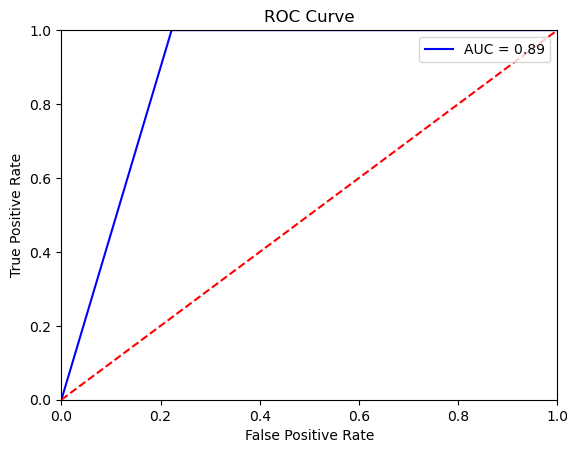

In [12]:
# ROC
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'upper right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

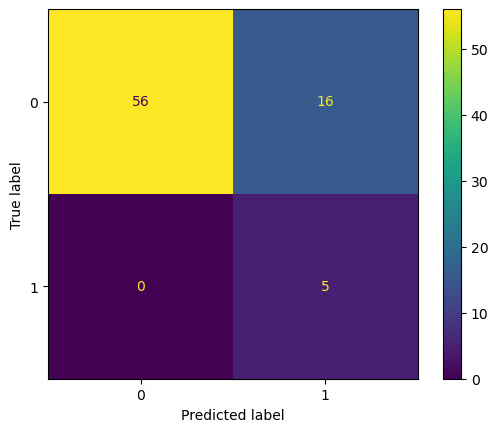

In [14]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix = cm1)
disp.plot()


## Gaussian Naive Bayes - Post-Feature Selection

In [18]:
train50_df = pd.read_csv('./df_50.csv')

In [19]:
train50, test50 = train_test_split(train50_df, test_size=0.2, random_state=550)
X_train50 = train50.drop(['label'], axis=1)
y_train50 = train50['label']

In [20]:
gnb50 = GaussianNB()
gnb50.fit(X_train50, y_train50)

GaussianNB()

In [21]:
y_pred50 = gnb50.predict(X_train50)
print("Number of mislabeled points out of a total %d points back on TRAIN50 SET: %d" % (X_train50.shape[0], (y_train50 != y_pred50).sum()))

Number of mislabeled points out of a total 308 points back on TRAIN50 SET: 61


In [22]:
X_test50 = test50.drop(['label'], axis=1)
y_test50 = test50['label']

In [25]:
y_pred50 = gnb50.predict(X_test50)

In [26]:
acc2 = accuracy_score(y_test50, y_pred50)
prec2, rec2, fbeta2, sup2 = precision_recall_fscore_support(y_test50, y_pred50)
fpr2, tpr2, threshold2 = roc_curve(y_test50, y_pred50)
roc_auc2 = auc(fpr2, tpr2)
cm2 = confusion_matrix(y_test50, y_pred50)

In [29]:
print(f'Accuracy: {acc2}')
print(f'Precision: {prec2}')
print(f'Recall: {rec2}')
print(f'F1-Score: {fbeta2}')

Accuracy: 0.7922077922077922
Precision: [1.         0.23809524]
Recall: [0.77777778 1.        ]
F1-Score: [0.875      0.38461538]


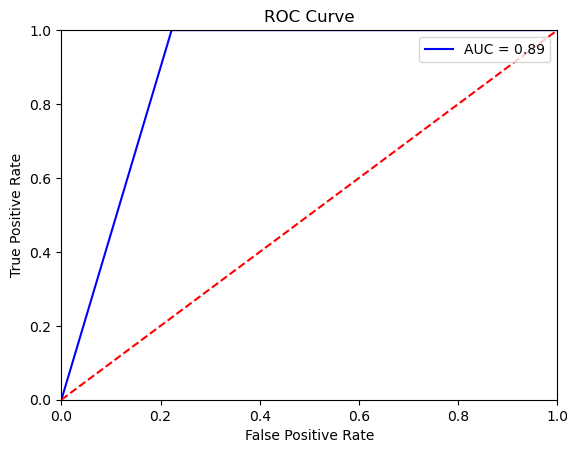

In [30]:
# ROC
plt.title('ROC Curve')
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'upper right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

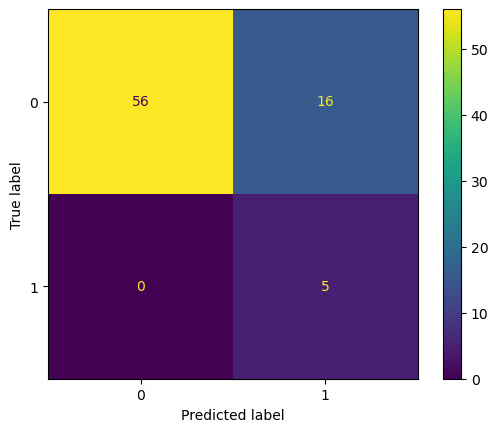

In [31]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm2)
disp.plot()

## Gaussian Naive Bayes - PCA

In [39]:
from sklearn.decomposition import PCA

X_pca = train_df.copy()
y_pca = train_df['label']

In [40]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X_pca)

In [41]:
pcaDF = pd.DataFrame(data=principalComponents, columns=['pca1','pca2','pca3','pca4','pca5'])
finalDF = pd.concat([pcaDF, y_pca], axis=1)

In [42]:
finalDF.head()

,pca1,pca2,pca3,pca4,pca5,label
0,175510.079153,1808.310237,-2003.843927,-86.268683,-19.943979,0
1,175510.079153,1808.310237,-2003.843927,-86.268683,-19.943979,0
2,175510.079153,1808.310293,-2003.843881,-86.268812,-19.944813,0
3,175510.079054,1808.311550,-2003.838403,-86.254407,-19.220502,0
4,175510.079054,1808.311550,-2003.838403,-86.254407,-19.220502,0


In [43]:
finalDF['label'] = finalDF['label'].fillna(0)

In [44]:
finalDF.head()

,pca1,pca2,pca3,pca4,pca5,label
0,175510.079153,1808.310237,-2003.843927,-86.268683,-19.943979,0
1,175510.079153,1808.310237,-2003.843927,-86.268683,-19.943979,0
2,175510.079153,1808.310293,-2003.843881,-86.268812,-19.944813,0
3,175510.079054,1808.311550,-2003.838403,-86.254407,-19.220502,0
4,175510.079054,1808.311550,-2003.838403,-86.254407,-19.220502,0


In [46]:
pcaTrain, pcaTest = train_test_split(finalDF, test_size=0.2, random_state=550)

In [47]:
X_trainPCA = pcaTrain.drop(['label'], axis=1)
y_trainPCA = pcaTrain['label']

In [48]:
gnbPCA = GaussianNB()
gnbPCA.fit(X_trainPCA, y_trainPCA)

GaussianNB()

In [49]:
X_testPCA = pcaTest.drop(['label'], axis=1)
y_testPCA = pcaTest['label']

In [50]:
y_predPCA = gnbPCA.predict(X_testPCA)

In [51]:
accPCA = accuracy_score(y_testPCA, y_predPCA)
precPCA, recPCA, fbetaPCA, supPCA = precision_recall_fscore_support(y_testPCA, y_predPCA)
fprPCA, tprPCA, thresholdPCA = roc_curve(y_testPCA, y_predPCA)
roc_aucPCA = auc(fprPCA, tprPCA)
cmPCA = confusion_matrix(y_testPCA, y_predPCA)

In [52]:
print(f'Accuracy: {accPCA}')
print(f'Precision: {precPCA}')
print(f'Recall: {recPCA}')
print(f'F1-Score: {fbetaPCA}')

Accuracy: 0.948051948051948
Precision: [0.98571429 0.57142857]
Recall: [0.95833333 0.8       ]
F1-Score: [0.97183099 0.66666667]


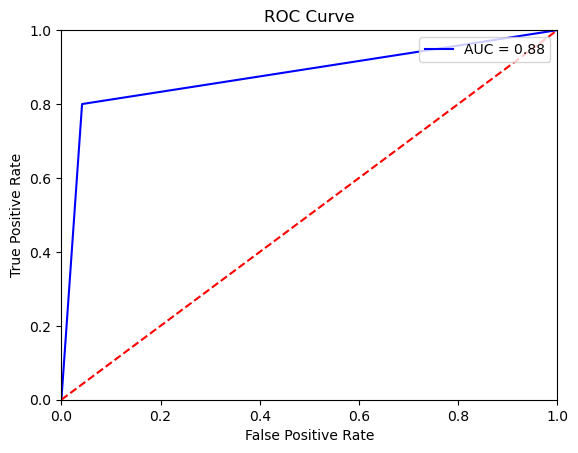

In [53]:
# ROC
plt.title('ROC Curve')
plt.plot(fprPCA, tprPCA, 'b', label = 'AUC = %0.2f' % roc_aucPCA)
plt.legend(loc = 'upper right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

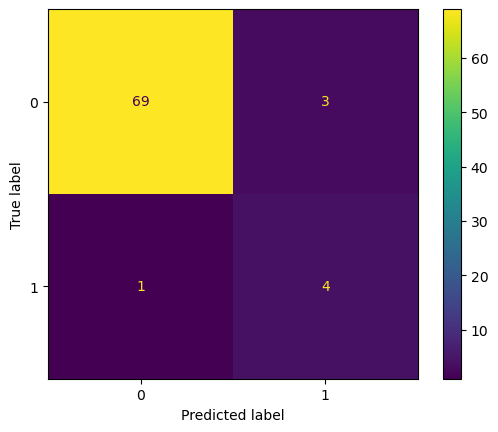

In [54]:
disp = ConfusionMatrixDisplay(confusion_matrix = cmPCA)
disp.plot()

